In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 

pd.set_option('future.no_silent_downcasting', True)

In [3]:
df = pd.read_csv('../data/raw/interstellar_travel.csv')
df

,Age,Gender,Occupation,Travel Class,Destination,Star System,Distance to Destination (Light-Years),Duration of Stay (Earth Days),Number of Companions,Purpose of Travel,Transportation Type,Price (Galactic Credits),Booking Date,Departure Date,Special Requests,Loyalty Program Member,Month,Customer Satisfaction Score
0,14,Female,Colonist,Business,Gliese 581,Cunningham Mountains,1.09,11.0,5,Tourism,Warp Drive,828.949275,2023-09-17,2025-01-07,Other,No,9,105.0
1,22,Male,Tourist,Economy,Alpha Centauri,Hayes Trace,5.70,23.0,0,Research,Solar Sailing,488.469135,2023-03-31,2025-12-26,Other,No,3,102.0
2,62,Female,Businessperson,Luxury,Alpha Centauri,Anna Port,0.37,4.0,1,Tourism,Ion Thruster,183.745881,2022-05-19,2025-01-04,NaN,Yes,5,100.0
3,21,Female,Colonist,Economy,Lalande 21185,Henry Ville,0.32,23.0,1,Tourism,Warp Drive,358.754000,2023-04-13,2024-02-09,NaN,No,4,108.0
4,42,Male,Explorer,Luxury,Exotic Destination 10,Graves Mall,6.17,42.0,1,Colonization,Ion Thruster,3073.759920,2023-06-12,2024-03-15,Special Meal,No,6,97.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
547563,72,Male,Scientist,Economy,Zeta II Reticuli,Peterson Pike,0.29,41.0,1,Research,Warp Drive,274.456298,2024-01-22,2024-10-31,Special Meal,No,1,100.0
547564,23,Male,Tourist,Business,Exotic Destination 7,Ronald Row,27.61,4.0,2,Business,Warp Drive,2784.565350,2022-11-09,2024-07-09,Special Meal,Yes,11,115.0
547565,6,Female,Colonist,Business,Proxima Centauri,John Lane,4.04,11.0,0,Other,Solar Sailing,2640.288420,2023-07-02,2024-07-24,Window Seat,No,7,102.0
547566,21,Female,Other,Business,Alpha Centauri,Elizabeth Mountain,4.20,13.0,0,Tourism,Warp Drive,420.132116,2022-12-09,2025-12-06,Extra Space Suit,No,12,105.0


In [3]:
df.columns

Index(['Age', 'Gender', 'Occupation', 'Travel Class', 'Destination',
       'Star System', 'Distance to Destination (Light-Years)',
       'Duration of Stay (Earth Days)', 'Number of Companions',
       'Purpose of Travel', 'Transportation Type', 'Price (Galactic Credits)',
       'Booking Date', 'Departure Date', 'Special Requests',
       'Loyalty Program Member', 'Month', 'Customer Satisfaction Score'],
      dtype='object')

In [4]:
star_system_destination = df[['Star System', 'Destination', 'Distance to Destination (Light-Years)']]
star_system_destination.to_csv('../app/data/star_system_destination.csv', index=False)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 547568 entries, 0 to 547567
Data columns (total 18 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   Age                                    547568 non-null  int64  
 1   Gender                                 547568 non-null  object 
 2   Occupation                             547568 non-null  object 
 3   Travel Class                           547568 non-null  object 
 4   Destination                            547568 non-null  object 
 5   Star System                            547568 non-null  object 
 6   Distance to Destination (Light-Years)  547568 non-null  float64
 7   Duration of Stay (Earth Days)          547568 non-null  float64
 8   Number of Companions                   547568 non-null  int64  
 9   Purpose of Travel                      547568 non-null  object 
 10  Transportation Type                    547568 non-null  

In [6]:
df.isnull().sum()

Age                                           0
Gender                                        0
Occupation                                    0
Travel Class                                  0
Destination                                   0
Star System                                   0
Distance to Destination (Light-Years)         0
Duration of Stay (Earth Days)                 0
Number of Companions                          0
Purpose of Travel                             0
Transportation Type                           0
Price (Galactic Credits)                      0
Booking Date                                  0
Departure Date                                0
Special Requests                         109350
Loyalty Program Member                        0
Month                                         0
Customer Satisfaction Score                   0
dtype: int64

In [7]:
df.describe()

,Age,Distance to Destination (Light-Years),Duration of Stay (Earth Days),Number of Companions,Price (Galactic Credits),Month,Customer Satisfaction Score
count,547568.000000,547568.000000,547568.00000,547568.000000,547568.000000,547568.000000,547568.000000
mean,31.097029,8.333134,33.97513,1.107523,1034.273413,6.516975,101.660112
std,19.668694,24.073530,33.35670,1.094676,1384.904184,3.454901,9.292661
min,0.000000,0.000000,0.00000,0.000000,-6171.142478,1.000000,32.250000
25%,16.000000,0.980000,11.00000,0.000000,271.827658,4.000000,100.000000
50%,27.000000,2.710000,22.00000,1.000000,634.563876,7.000000,102.000000
75%,43.000000,7.450000,47.00000,2.000000,1306.127813,10.000000,107.000000
max,99.000000,2625.910000,426.00000,13.000000,103134.110795,12.000000,115.000000


Columna Customer Satisfaction Score

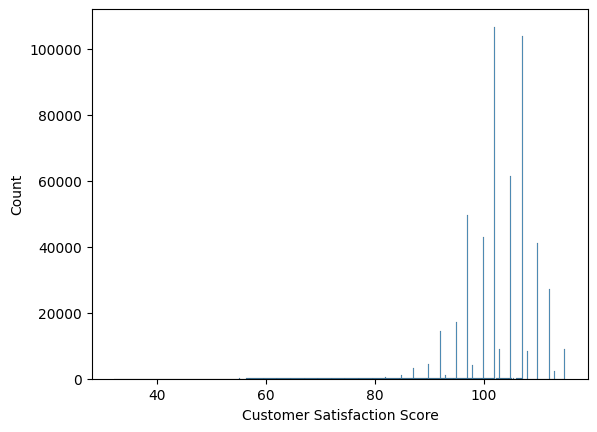

In [8]:
sns.histplot((df['Customer Satisfaction Score']));

In [9]:
print(df['Customer Satisfaction Score'].nunique())
print('-'*100)
print(df['Customer Satisfaction Score'].unique())
print('-'*100)
print(df['Customer Satisfaction Score'].value_counts(normalize=False))

6348
----------------------------------------------------------------------------------------------------
[105.   102.   100.   ...  44.26  54.1  108.86]
----------------------------------------------------------------------------------------------------
Customer Satisfaction Score
102.00    106508
107.00    103744
105.00     61358
97.00      49406
100.00     42945
           ...  
43.94          1
104.55         1
41.13          1
109.75         1
108.86         1
Name: count, Length: 6348, dtype: int64


In [10]:
df['Customer Satisfaction Score'].describe()

count    547568.000000
mean        101.660112
std           9.292661
min          32.250000
25%         100.000000
50%         102.000000
75%         107.000000
max         115.000000
Name: Customer Satisfaction Score, dtype: float64

Columna Special Request

In [11]:
print(df['Special Requests'].nunique())
print('-'*100)
print(df['Special Requests'].unique())
print('-'*100)
print(df['Special Requests'].value_counts(normalize=True))

4
----------------------------------------------------------------------------------------------------
['Other' nan 'Special Meal' 'Window Seat' 'Extra Space Suit']
----------------------------------------------------------------------------------------------------
Special Requests
Window Seat         0.250982
Special Meal        0.250102
Extra Space Suit    0.249981
Other               0.248935
Name: proportion, dtype: float64


In [12]:
df['Special Requests'] = df['Special Requests'].fillna('Other')

In [13]:
df.groupby('Special Requests')['Customer Satisfaction Score'].mean().sort_values()

Special Requests
Other               101.053898
Special Meal        102.058856
Window Seat         102.060470
Extra Space Suit    102.068024
Name: Customer Satisfaction Score, dtype: float64

In [14]:
df['Special Requests'] = df['Special Requests'].map({'Other' : 0,
                                                     'Special Meal' : 1, 
                                                     'Window Seat' : 1,        
                                                     'Extra Space Suit' :1})

Columna Age

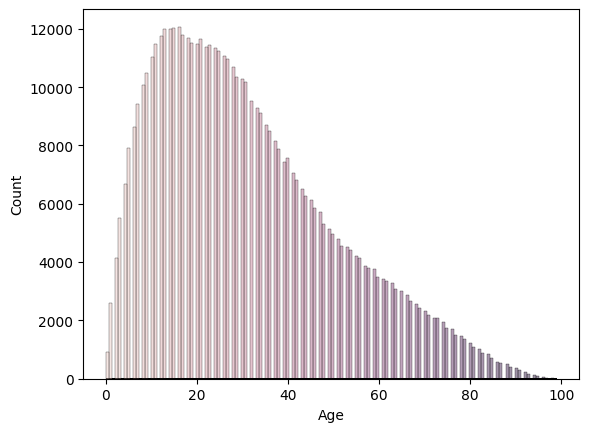

In [15]:
sns.histplot(df, x='Age', hue='Age',  legend=False);

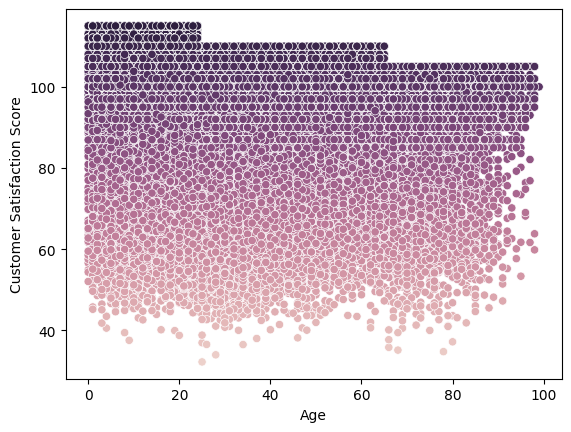

In [16]:
sns.scatterplot(df, x='Age', y='Customer Satisfaction Score', hue='Customer Satisfaction Score', legend=False);

In [17]:
print(df['Age'].nunique())
print('-'*100)
print(df['Age'].unique())
print('-'*100)
print(df['Age'].value_counts(normalize=False))

100
----------------------------------------------------------------------------------------------------
[14 22 62 21 42 30 51 19 78 81 12 33 35  8 23 66 36 13 39  7  4 32 26  5
 27 53 15 80 47 29 34  3 70 48 10 74 43 90 11 28  1 31 24 16 18 38 61 20
 17 72 76 88 59 87 40 75 83  6 46  9 64  2 45 25 50 54 44 41 65 52 56 37
 69 77 73 57 68  0 92 60 63 85 49 91 55 71 67 58 86 79 84 94 82 89 93 96
 95 97 98 99]
----------------------------------------------------------------------------------------------------
Age
16    12072
15    12030
13    12009
14    11984
17    11774
      ...  
95       77
96       50
97       24
98       13
99        1
Name: count, Length: 100, dtype: int64


In [18]:
df.groupby('Age')['Customer Satisfaction Score'].mean().sort_values()

Age
98     94.127692
96     95.938800
83     96.123150
66     96.260920
68     96.299109
         ...    
20    104.190083
22    104.208895
21    104.451218
24    104.493042
23    104.530276
Name: Customer Satisfaction Score, Length: 100, dtype: float64

Columna Gender

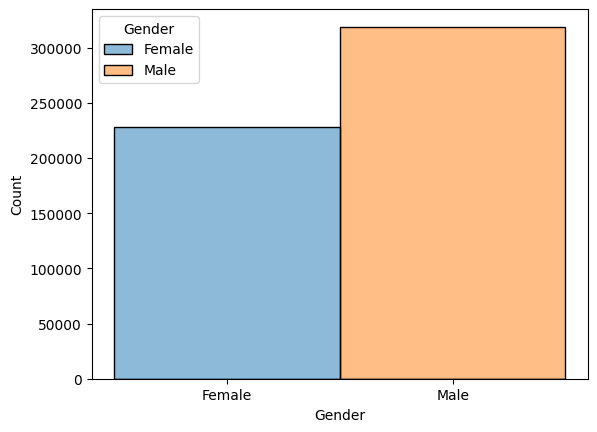

In [19]:
sns.histplot(df, x='Gender', hue='Gender');

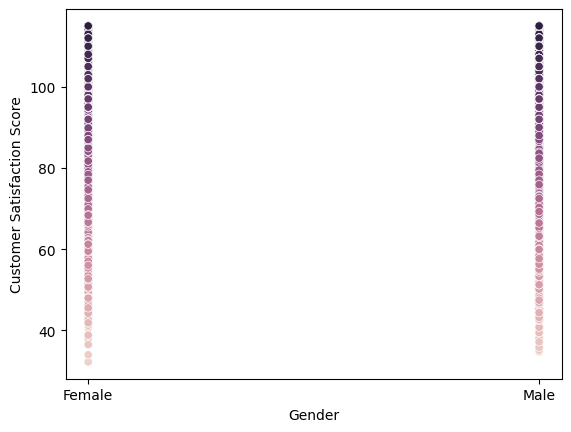

In [20]:
sns.scatterplot(df, x='Gender', y='Customer Satisfaction Score', hue='Customer Satisfaction Score', legend=False);


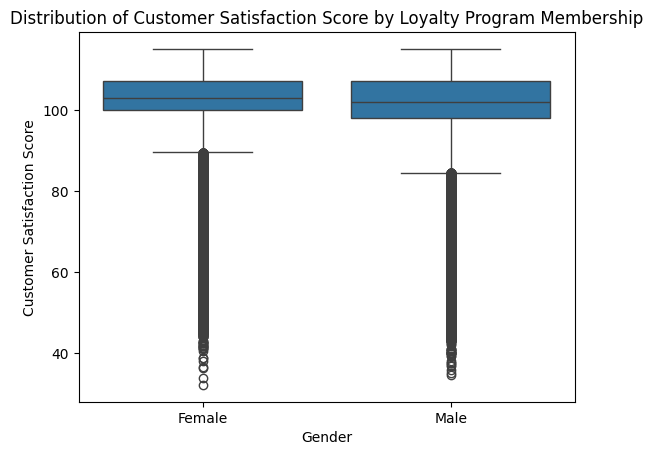

In [21]:
# Crear el diagrama de caja
sns.boxplot(x='Gender', y='Customer Satisfaction Score', data=df)

# Añadir etiquetas y título
plt.xlabel('Gender')
plt.ylabel('Customer Satisfaction Score')
plt.title('Distribution of Customer Satisfaction Score by Loyalty Program Membership')

# Mostrar el diagrama
plt.show()

In [22]:
print(df['Gender'].nunique())
print('-'*100)
print(df['Gender'].unique())
print('-'*100)
print(df['Gender'].value_counts(normalize=False))

2
----------------------------------------------------------------------------------------------------
['Female' 'Male']
----------------------------------------------------------------------------------------------------
Gender
Male      319005
Female    228563
Name: count, dtype: int64


In [23]:
df.groupby('Gender')['Customer Satisfaction Score'].mean().sort_values()

Gender
Male      101.338841
Female    102.108511
Name: Customer Satisfaction Score, dtype: float64

In [24]:
df['Gender'] = df['Gender'].map({'Male': 0,
                                'Female': 1})

Columna Occupation

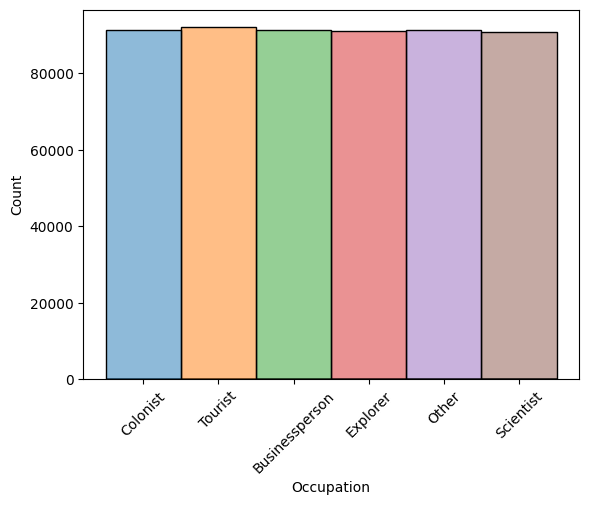

In [25]:
sns.histplot(df, x='Occupation', hue='Occupation', legend=False)
plt.xticks(rotation=45);

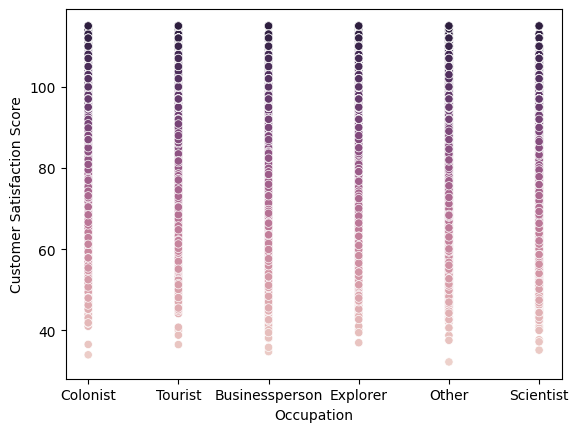

In [26]:
sns.scatterplot(df, x='Occupation', y='Customer Satisfaction Score', hue='Customer Satisfaction Score', legend=False);


In [27]:
print(df['Occupation'].nunique())
print('-'*100)
print(df['Occupation'].unique())
print('-'*100)
print(df['Occupation'].value_counts(normalize=True))

6
----------------------------------------------------------------------------------------------------
['Colonist' 'Tourist' 'Businessperson' 'Explorer' 'Other' 'Scientist']
----------------------------------------------------------------------------------------------------
Occupation
Tourist           0.168105
Businessperson    0.166787
Colonist          0.166551
Other             0.166544
Explorer          0.166199
Scientist         0.165815
Name: proportion, dtype: float64


In [28]:
(df.groupby('Occupation')['Customer Satisfaction Score'].mean()).sort_values()

Occupation
Scientist          99.649115
Businessperson    100.109024
Explorer          102.372403
Other             102.487650
Tourist           102.641974
Colonist          102.686197
Name: Customer Satisfaction Score, dtype: float64

In [29]:
df['Occupation'] = df['Occupation'].map({'Scientist' : 0,
                                         'Businessperson' : 1, 
                                         'Explorer' : 3,        
                                         'Other' :3,           
                                         'Tourist' :3,        
                                         'Colonist' : 3})

Columna Travel Class

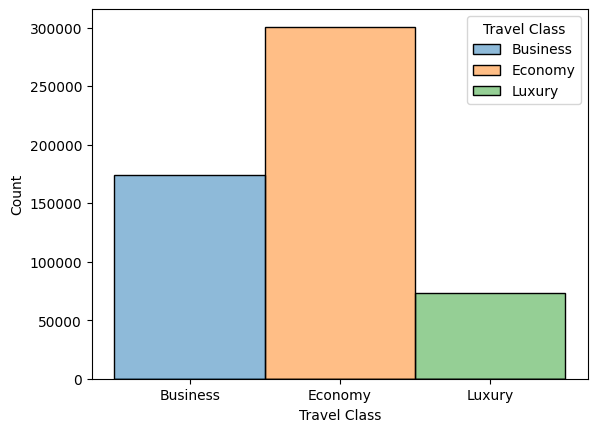

In [30]:
sns.histplot(df, x='Travel Class', hue='Travel Class');

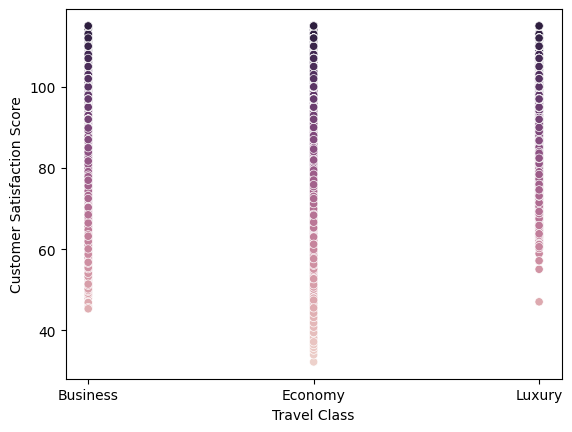

In [31]:
sns.scatterplot(df, x='Travel Class', y='Customer Satisfaction Score', hue='Customer Satisfaction Score', legend=False);


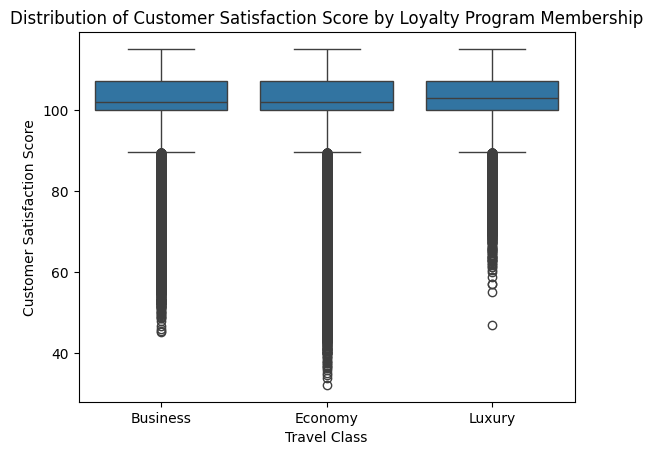

In [32]:
# Crear el diagrama de caja
sns.boxplot(x='Travel Class', y='Customer Satisfaction Score', data=df)

# Añadir etiquetas y título
plt.xlabel('Travel Class')
plt.ylabel('Customer Satisfaction Score')
plt.title('Distribution of Customer Satisfaction Score by Loyalty Program Membership')

# Mostrar el diagrama
plt.show()

In [33]:
print(df['Travel Class'].nunique())
print('-'*100)
print(df['Travel Class'].unique())
print('-'*100)
print(df['Travel Class'].value_counts(normalize=False))

3
----------------------------------------------------------------------------------------------------
['Business' 'Economy' 'Luxury']
----------------------------------------------------------------------------------------------------
Travel Class
Economy     300679
Business    173761
Luxury       73128
Name: count, dtype: int64


In [34]:
(df.groupby('Travel Class')['Customer Satisfaction Score'].mean()).sort_values()

Travel Class
Economy     101.374557
Business    101.667045
Luxury      102.817751
Name: Customer Satisfaction Score, dtype: float64

In [35]:
df['Travel Class'] = df['Travel Class'].map({'Economy': 0,
                                             'Business': 0,
                                             'Luxury': 1})

Columna Destination

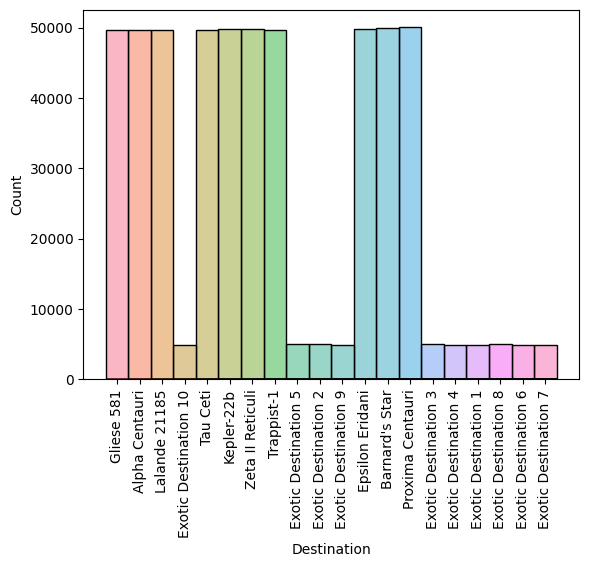

In [36]:
sns.histplot(df, x='Destination', hue='Destination', legend=False)
plt.xticks(rotation=90);

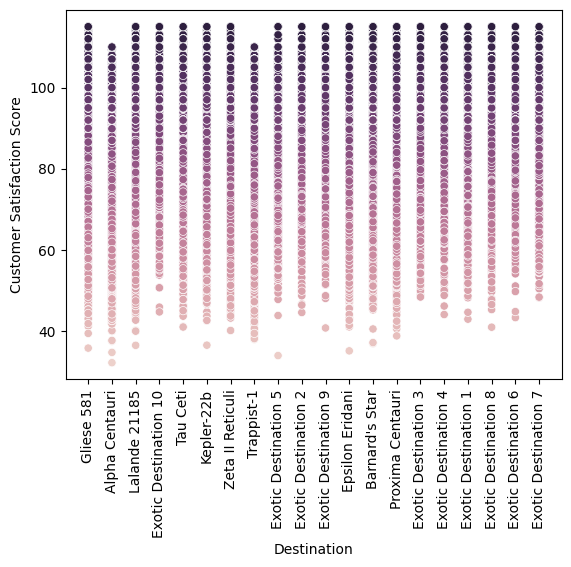

In [37]:
sns.scatterplot(df, x='Destination', y='Customer Satisfaction Score', hue='Customer Satisfaction Score', legend=False)
plt.xticks(rotation=90);

In [38]:
print(df['Destination'].nunique())
print('-'*100)
print(df['Destination'].unique())
print('-'*100)
print(df['Destination'].value_counts(normalize=False))

20
----------------------------------------------------------------------------------------------------
['Gliese 581' 'Alpha Centauri' 'Lalande 21185' 'Exotic Destination 10'
 'Tau Ceti' 'Kepler-22b' 'Zeta II Reticuli' 'Trappist-1'
 'Exotic Destination 5' 'Exotic Destination 2' 'Exotic Destination 9'
 'Epsilon Eridani' "Barnard's Star" 'Proxima Centauri'
 'Exotic Destination 3' 'Exotic Destination 4' 'Exotic Destination 1'
 'Exotic Destination 8' 'Exotic Destination 6' 'Exotic Destination 7']
----------------------------------------------------------------------------------------------------
Destination
Proxima Centauri         50034
Barnard's Star           49946
Zeta II Reticuli         49855
Epsilon Eridani          49818
Kepler-22b               49773
Tau Ceti                 49707
Alpha Centauri           49703
Trappist-1               49699
Gliese 581               49673
Lalande 21185            49634
Exotic Destination 3      5054
Exotic Destination 5      5048
Exotic Destinatio

In [39]:
(df.groupby('Destination')['Customer Satisfaction Score'].mean()).sort_values()

Destination
Alpha Centauri            97.501743
Trappist-1                97.551767
Exotic Destination 1     102.377658
Gliese 581               102.513260
Tau Ceti                 102.533661
Epsilon Eridani          102.540693
Proxima Centauri         102.556988
Kepler-22b               102.557384
Lalande 21185            102.562694
Exotic Destination 10    102.571758
Exotic Destination 4     102.589269
Exotic Destination 5     102.597347
Exotic Destination 2     102.599890
Exotic Destination 3     102.602145
Exotic Destination 9     102.631837
Barnard's Star           102.647733
Zeta II Reticuli         102.660351
Exotic Destination 7     102.680967
Exotic Destination 8     102.694519
Exotic Destination 6     102.843903
Name: Customer Satisfaction Score, dtype: float64

In [40]:
df['Destination'] = df['Destination'].map({'Alpha Centauri': 0,
                                           'Trappist-1': 0,
                                           'Exotic Destination 1': 5,
                                           'Gliese 581': 5,
                                           'Tau Ceti': 5,
                                           'Epsilon Eridani': 5,
                                           'Proxima Centauri': 5,
                                           'Kepler-22b': 5,
                                           'Lalande 21185': 5,
                                           'Exotic Destination 10': 5,
                                           'Exotic Destination 4': 5,
                                           'Exotic Destination 5': 5,
                                           'Exotic Destination 2': 5,
                                           'Exotic Destination 3': 5,
                                           'Exotic Destination 9': 5,
                                           'Barnard\'s Star': 5,
                                           'Zeta II Reticuli': 5,
                                           'Exotic Destination 7': 5,
                                           'Exotic Destination 8': 5,
                                           'Exotic Destination 6': 5})  

Columna Star System

In [41]:
print(df['Star System'].nunique())
print('-'*100)
print(df['Star System'].unique())
print('-'*100)
print(df['Star System'].value_counts(normalize=False))

183888
----------------------------------------------------------------------------------------------------
['Cunningham Mountains' 'Hayes Trace' 'Anna Port' ... 'Newton Ways'
 'Max Forks' 'Jonathon Hollow']
----------------------------------------------------------------------------------------------------
Star System
Michael Port         73
Michael Summit       71
Michael Springs      68
Smith Summit         67
Smith Drive          65
                     ..
Hancock Stravenue     1
Hogan Ways            1
Armstrong Trace       1
Shaun Mills           1
Jonathon Hollow       1
Name: count, Length: 183888, dtype: int64


In [42]:
df.groupby('Star System')['Customer Satisfaction Score'].mean().sort_values()


Star System
Kaitlyn Path         34.78
Brad Road            37.20
Mcconnell Harbor     38.02
Palmer Neck          40.01
Greene River         40.63
                     ...  
Jenna Wall          115.00
Mayer Points        115.00
Denise Views        115.00
Maynard Course      115.00
Monroe Mills        115.00
Name: Customer Satisfaction Score, Length: 183888, dtype: float64

In [43]:
list_star_system = list((df.groupby('Star System')['Customer Satisfaction Score'].mean().sort_values()).index)
dict_star_system = {}
for i in range(len(list_star_system)):
    dict_star_system[list_star_system[i]] = i

In [44]:
df_star_system = pd.DataFrame(list(dict_star_system.items()), columns=['star_system', 'num'])
df_star_system.to_csv('../app/data/star_system.csv', index=False)

In [45]:
df['Star System'] = df['Star System'].map(df_star_system.set_index('star_system')['num'])

Columna Distance to Destination

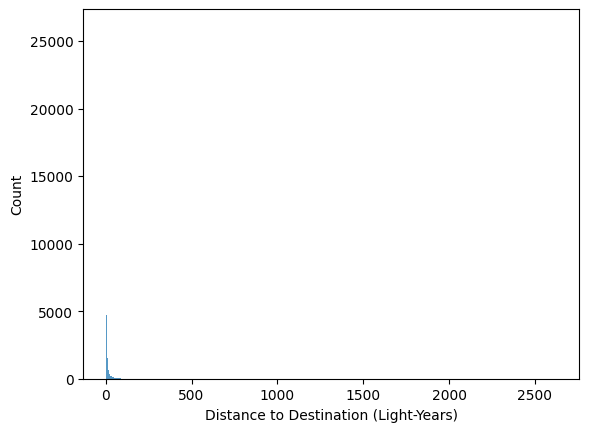

In [46]:
sns.histplot(df['Distance to Destination (Light-Years)']);

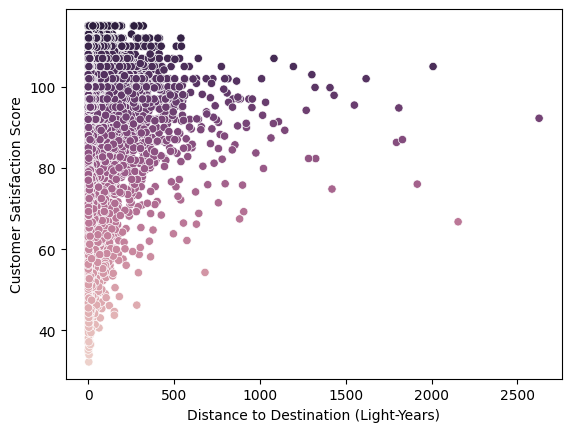

In [47]:
sns.scatterplot(df, x='Distance to Destination (Light-Years)', y='Customer Satisfaction Score', hue='Customer Satisfaction Score', legend=False);

In [48]:
print(df['Distance to Destination (Light-Years)'].nunique())
print('-'*100)
print(df['Distance to Destination (Light-Years)'].unique())
print('-'*100)
print(df['Distance to Destination (Light-Years)'].value_counts(normalize=False))
print('-'*100)
print(df['Distance to Destination (Light-Years)'].max())
print('-'*100)
print(df['Distance to Destination (Light-Years)'].min())

12722
----------------------------------------------------------------------------------------------------
[  1.09   5.7    0.37 ... 101.79 101.49 110.77]
----------------------------------------------------------------------------------------------------
Distance to Destination (Light-Years)
0.29       1711
0.26       1698
0.24       1697
0.32       1689
0.31       1681
           ... 
605.41        1
1081.88       1
739.42        1
186.65        1
110.77        1
Name: count, Length: 12722, dtype: int64
----------------------------------------------------------------------------------------------------
2625.91
----------------------------------------------------------------------------------------------------
0.0


In [49]:
df['Distance to Destination (Light-Years)'].describe()

count    547568.000000
mean          8.333134
std          24.073530
min           0.000000
25%           0.980000
50%           2.710000
75%           7.450000
max        2625.910000
Name: Distance to Destination (Light-Years), dtype: float64

Columna Duration of Stay

In [50]:
print(df['Duration of Stay (Earth Days)'].nunique())
print('-'*100)
print(df['Duration of Stay (Earth Days)'].unique())
print('-'*100)
print(df['Duration of Stay (Earth Days)'].value_counts(normalize=False))

410
----------------------------------------------------------------------------------------------------
[ 11.   23.    4.   42.   60.   90.    6.   28.   72.  155.   22.   27.
  71.    8.    1.   80.   18.   70.   19.   17.   64.   69.   21.   79.
  65.    3.   81.   29.   26.   13.   35.    7.   16.   91.   25.   62.
  84.   55.  146.  115.5  50.   10.   95.   24.   58.  106.   73.   45.
   2.    9.  120.    5.  131.  114.   52.   33.   20.   39.   15.   31.
  19.5  37.   61.  119.   14.   57.   49.   66.   51.   53.   12.   16.5
  43.   13.5  31.5  38.  102.   46.   44.   34.   82.  189.   10.5  56.
  63.   28.5  92.   32.   87.   83.   41.  109.  118.   36.   22.5  30.
  48.   55.5  67.  181.5  40.   77.  180.   59.   86.  110.  121.   47.
  74.   85.  112.    0.   75.   49.5  54.  104.   58.5  68.   46.5  76.
 139.  133.  100.   94.   97.  111.  128.   64.5  98.  140.   96.  115.
 126.  105.    1.5 159.  122.    7.5  99.   78.  144.  116.  103.   61.5
 186.   89.  113.   88.  125.

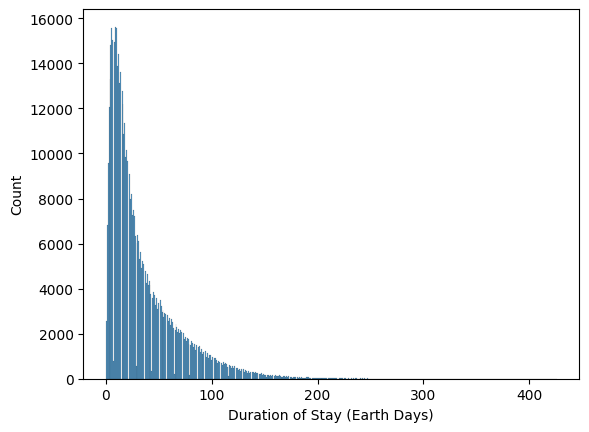

In [51]:
sns.histplot(df['Duration of Stay (Earth Days)']);

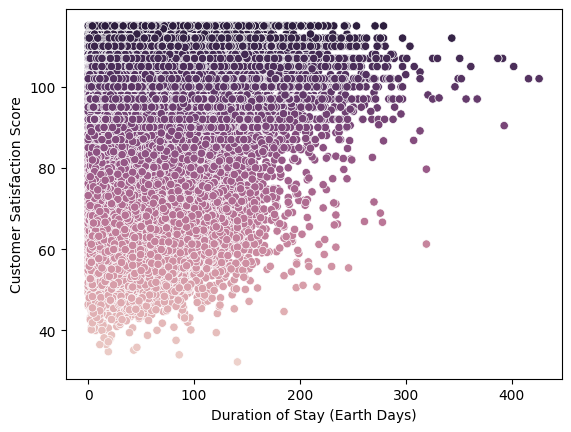

In [52]:
sns.scatterplot(df, x='Duration of Stay (Earth Days)', y='Customer Satisfaction Score', hue='Customer Satisfaction Score', legend=False);

In [53]:
df['Duration of Stay (Earth Days)'].describe()

count    547568.00000
mean         33.97513
std          33.35670
min           0.00000
25%          11.00000
50%          22.00000
75%          47.00000
max         426.00000
Name: Duration of Stay (Earth Days), dtype: float64

Columna Number of Companions

In [54]:
print(df['Number of Companions'].nunique())
print('-'*100)
print(df['Number of Companions'].unique())
print('-'*100)
print(df['Number of Companions'].value_counts(normalize=False))

12
----------------------------------------------------------------------------------------------------
[ 5  0  1  2  7  3  4  6  8 10  9 13]
----------------------------------------------------------------------------------------------------
Number of Companions
1     195761
0     187461
2     106213
3      40647
4      12741
5       3493
6        964
7        223
8         50
9         11
10         3
13         1
Name: count, dtype: int64


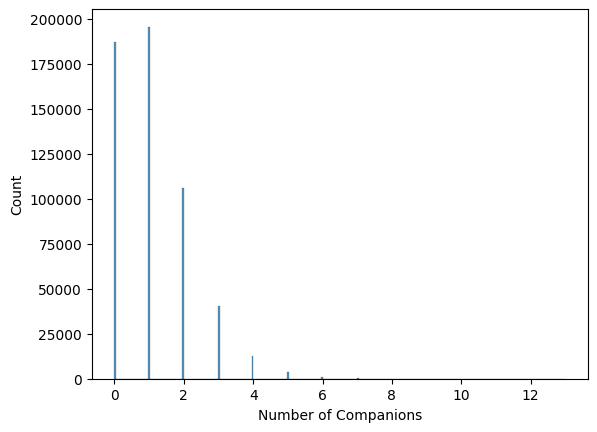

In [55]:
sns.histplot(df['Number of Companions']);

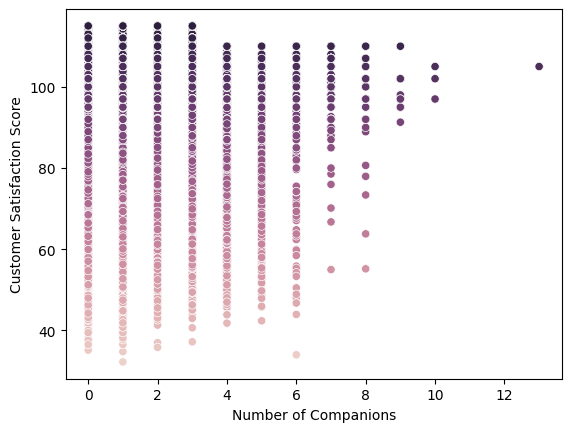

In [56]:
sns.scatterplot(df, x='Number of Companions', y='Customer Satisfaction Score', hue='Customer Satisfaction Score', legend=False);

In [57]:
df.groupby('Number of Companions')['Customer Satisfaction Score'].mean().sort_values()


Number of Companions
8      96.777800
5      98.460733
6      98.663268
4      98.932800
9      99.208182
7      99.410090
10    101.333333
0     101.660196
1     101.727173
2     101.844812
3     102.073986
13    105.000000
Name: Customer Satisfaction Score, dtype: float64

Columna Purpose of Travel

In [58]:
print(df['Purpose of Travel'].nunique())
print('-'*100)
print(df['Purpose of Travel'].unique())
print('-'*100)
print(df['Purpose of Travel'].value_counts(normalize=False))

5
----------------------------------------------------------------------------------------------------
['Tourism' 'Research' 'Colonization' 'Business' 'Other']
----------------------------------------------------------------------------------------------------
Purpose of Travel
Tourism         109744
Research        109650
Business        109557
Other           109455
Colonization    109162
Name: count, dtype: int64


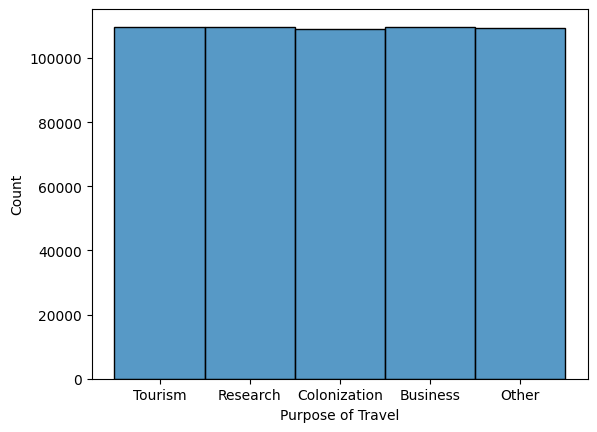

In [59]:
sns.histplot(df['Purpose of Travel']);

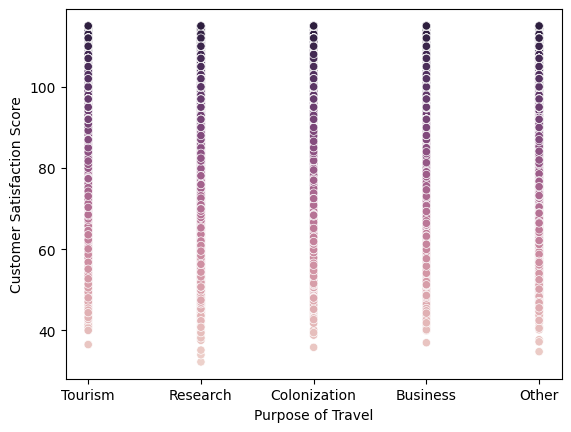

In [60]:
sns.scatterplot(df, x='Purpose of Travel', y='Customer Satisfaction Score', hue='Customer Satisfaction Score', legend=False);

In [61]:
(df.groupby('Purpose of Travel')['Customer Satisfaction Score'].mean()).sort_values()

Purpose of Travel
Tourism         101.389863
Research        101.711657
Business        101.727027
Colonization    101.729584
Other           101.743177
Name: Customer Satisfaction Score, dtype: float64

In [62]:
df['Purpose of Travel'] = df['Purpose of Travel'].map({'Tourism' : 0,
                                                       'Research' : 1, 
                                                       'Business' : 1,        
                                                       'Colonization' :1,           
                                                       'Other' :1})

Columna Transportation Type

In [63]:
print(df['Transportation Type'].nunique())
print('-'*100)
print(df['Transportation Type'].unique())
print('-'*100)
print(df['Transportation Type'].value_counts(normalize=False))

4
----------------------------------------------------------------------------------------------------
['Warp Drive' 'Solar Sailing' 'Ion Thruster' 'Other']
----------------------------------------------------------------------------------------------------
Transportation Type
Solar Sailing    137266
Other            136855
Ion Thruster     136808
Warp Drive       136639
Name: count, dtype: int64


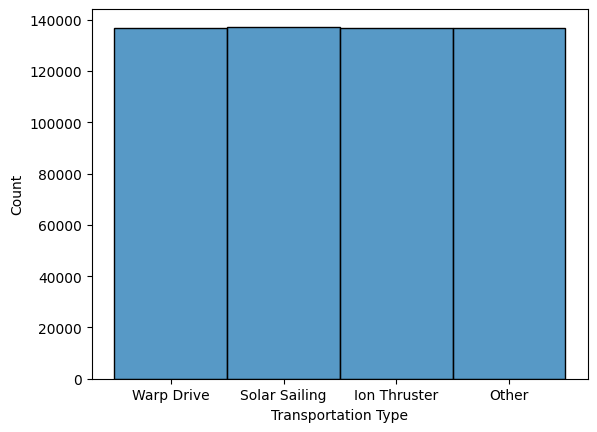

In [64]:
sns.histplot(df['Transportation Type']);

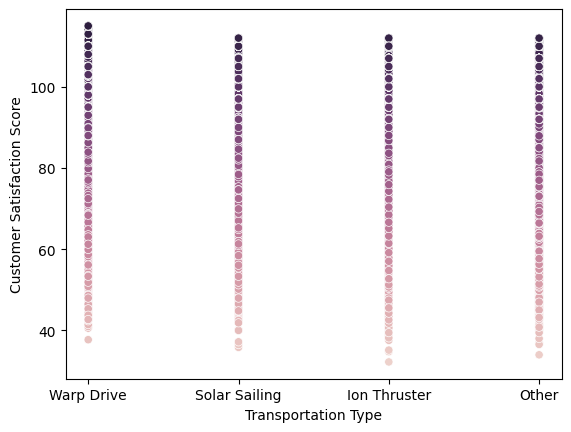

In [65]:
sns.scatterplot(df, x='Transportation Type', y='Customer Satisfaction Score', hue='Customer Satisfaction Score', legend=False);

In [66]:
(df.groupby('Transportation Type')['Customer Satisfaction Score'].mean()).sort_values()

Transportation Type
Ion Thruster     100.874811
Other            100.907647
Solar Sailing    100.972196
Warp Drive       103.891114
Name: Customer Satisfaction Score, dtype: float64

In [67]:
df['Transportation Type'] = df['Transportation Type'].map({'Ion Thruster' : 0,
                                                           'Other' : 0, 
                                                           'Solar Sailing' : 0,        
                                                           'Warp Drive' :2})

Columna Price

In [68]:
print(df['Price (Galactic Credits)'].nunique())
print('-'*100)
print(df['Price (Galactic Credits)'].unique())
print('-'*100)
print(df['Price (Galactic Credits)'].value_counts(normalize=False))

485105
----------------------------------------------------------------------------------------------------
[ 828.949275  488.469135  183.745881 ... 2640.28842   420.132116
  629.199995]
----------------------------------------------------------------------------------------------------
Price (Galactic Credits)
0.000000       11
205.821000      9
113.201550      9
364.448700      9
192.861900      9
               ..
436.912245      1
2747.061350     1
1687.702144     1
260.353800      1
629.199995      1
Name: count, Length: 485105, dtype: int64


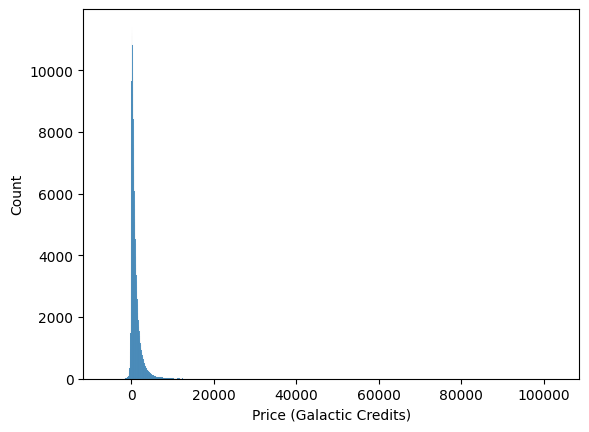

In [69]:
sns.histplot(df['Price (Galactic Credits)']);

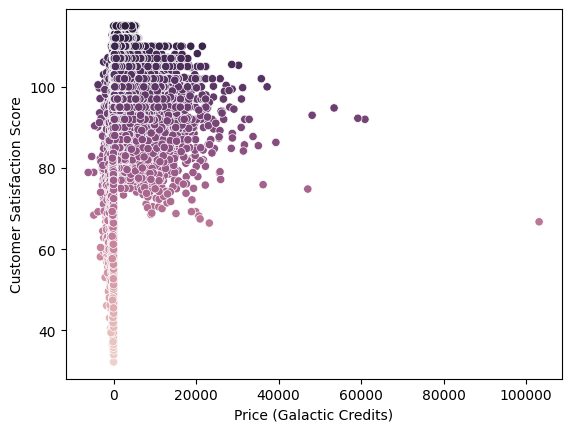

In [70]:
sns.scatterplot(df, x='Price (Galactic Credits)', y='Customer Satisfaction Score', hue='Customer Satisfaction Score', legend=False);

In [71]:
df['Price (Galactic Credits)'].describe()

count    547568.000000
mean       1034.273413
std        1384.904184
min       -6171.142478
25%         271.827658
50%         634.563876
75%        1306.127813
max      103134.110795
Name: Price (Galactic Credits), dtype: float64

In [72]:
df.groupby('Price (Galactic Credits)')['Customer Satisfaction Score'].mean().sort_values()

Price (Galactic Credits)
-7.479688        32.25
-7.767900        34.00
-40.115275       34.78
-1.631322        35.16
-86.666580       35.84
                 ...  
 214.417665     115.00
 116.828885     115.00
 475.737570     115.00
 1402.254315    115.00
 568.720845     115.00
Name: Customer Satisfaction Score, Length: 485105, dtype: float64

Columnas Booking Date y Departure Date

In [73]:
df['Booking Date'] = pd.to_datetime(df['Booking Date'])
df['Departure Date'] = pd.to_datetime(df['Departure Date'])
df['Tiempo Espera'] = df['Departure Date'] - df['Booking Date']

In [74]:
df['Tiempo Espera'].describe()


count                         547568
mean     730 days 10:45:33.477485904
std      297 days 15:49:12.675979532
min                  1 days 00:00:00
25%                517 days 00:00:00
50%                730 days 00:00:00
75%                944 days 00:00:00
max               1459 days 00:00:00
Name: Tiempo Espera, dtype: object

In [75]:
df['Tiempo Espera'] = pd.to_numeric(df['Tiempo Espera'])
df['Tiempo Espera'] = df['Tiempo Espera']/10**16
df['Tiempo Espera']

0         4.12992
1         8.64864
2         8.30304
3         2.60928
4         2.39328
           ...   
547563    2.44512
547564    5.25312
547565    3.35232
547566    9.44352
547567    7.34400
Name: Tiempo Espera, Length: 547568, dtype: float64

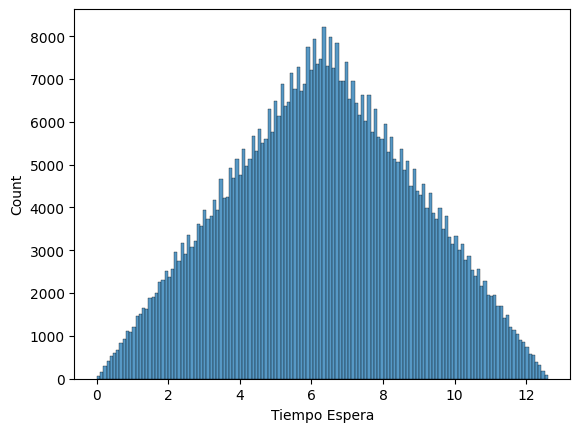

In [76]:
sns.histplot(df['Tiempo Espera']);

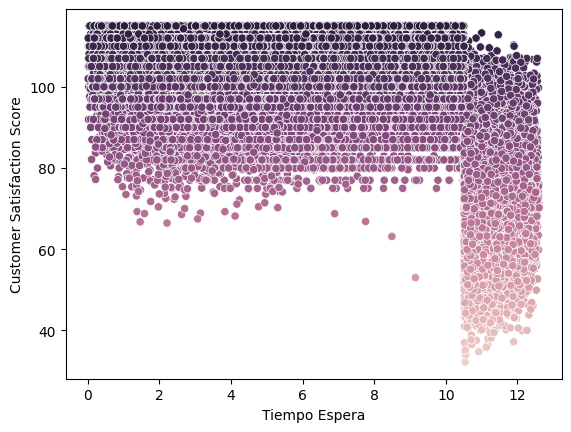

In [77]:
sns.scatterplot(df, x='Tiempo Espera', y='Customer Satisfaction Score', hue='Customer Satisfaction Score', legend=False);

In [78]:
print(df['Tiempo Espera'].nunique())
print('-'*100)
print(df['Tiempo Espera'].unique())
print('-'*100)
print(df['Tiempo Espera'].value_counts(normalize=False))

1458
----------------------------------------------------------------------------------------------------
[ 4.12992  8.64864  8.30304 ...  0.06048  0.05184 12.60576]
----------------------------------------------------------------------------------------------------
Tiempo Espera
6.37632     788
6.30720     788
6.44544     782
6.29856     780
6.27264     779
           ... 
0.04320       3
0.01728       3
0.05184       3
12.59712      2
12.60576      1
Name: count, Length: 1458, dtype: int64


In [79]:
df['Tiempo Espera'].describe()

count    547568.000000
mean          6.311073
std           2.571775
min           0.008640
25%           4.466880
50%           6.307200
75%           8.156160
max          12.605760
Name: Tiempo Espera, dtype: float64

In [80]:
df.groupby('Tiempo Espera')['Customer Satisfaction Score'].mean().sort_values()

Tiempo Espera
12.30336     69.657500
12.60576     70.230000
10.86912     70.442667
12.52800     70.490909
10.56672     70.566228
               ...    
0.04320     106.333333
0.08640     106.767778
0.06048     107.173333
0.00864     107.250000
0.03456     108.181667
Name: Customer Satisfaction Score, Length: 1458, dtype: float64

In [81]:
print(df['Booking Date'].nunique())
print('-'*100)
print(df['Booking Date'].unique())
print('-'*100)
print(df['Booking Date'].value_counts(normalize=False))

731
----------------------------------------------------------------------------------------------------
<DatetimeArray>
['2023-09-17 00:00:00', '2023-03-31 00:00:00', '2022-05-19 00:00:00',
 '2023-04-13 00:00:00', '2023-06-12 00:00:00', '2023-11-13 00:00:00',
 '2022-04-22 00:00:00', '2022-10-19 00:00:00', '2022-03-27 00:00:00',
 '2023-04-10 00:00:00',
 ...
 '2023-01-27 00:00:00', '2022-03-22 00:00:00', '2023-05-12 00:00:00',
 '2022-10-01 00:00:00', '2022-04-05 00:00:00', '2023-01-04 00:00:00',
 '2023-10-03 00:00:00', '2023-08-07 00:00:00', '2023-01-14 00:00:00',
 '2022-09-27 00:00:00']
Length: 731, dtype: datetime64[ns]
----------------------------------------------------------------------------------------------------
Booking Date
2023-05-23    853
2023-01-14    851
2023-01-12    844
2023-07-03    836
2023-07-05    825
             ... 
2022-11-15    678
2023-04-01    676
2023-12-04    674
2022-02-01    672
2022-11-26    656
Name: count, Length: 731, dtype: int64


In [82]:
print(df['Departure Date'].nunique())
print('-'*100)
print(df['Departure Date'].unique())
print('-'*100)
print(df['Departure Date'].value_counts(normalize=False))

730
----------------------------------------------------------------------------------------------------
<DatetimeArray>
['2025-01-07 00:00:00', '2025-12-26 00:00:00', '2025-01-04 00:00:00',
 '2024-02-09 00:00:00', '2024-03-15 00:00:00', '2025-02-16 00:00:00',
 '2024-06-11 00:00:00', '2024-07-18 00:00:00', '2025-06-08 00:00:00',
 '2024-06-13 00:00:00',
 ...
 '2025-04-26 00:00:00', '2024-02-18 00:00:00', '2024-04-01 00:00:00',
 '2025-03-09 00:00:00', '2025-09-21 00:00:00', '2025-04-09 00:00:00',
 '2025-09-11 00:00:00', '2024-02-26 00:00:00', '2024-05-22 00:00:00',
 '2024-07-28 00:00:00']
Length: 730, dtype: datetime64[ns]
----------------------------------------------------------------------------------------------------
Departure Date
2025-10-28    839
2025-05-26    827
2025-09-10    827
2024-12-07    824
2025-09-29    819
             ... 
2025-12-28    687
2025-10-18    683
2025-09-22    683
2024-11-26    671
2024-12-16    660
Name: count, Length: 730, dtype: int64


Columna Loyalty Program Member

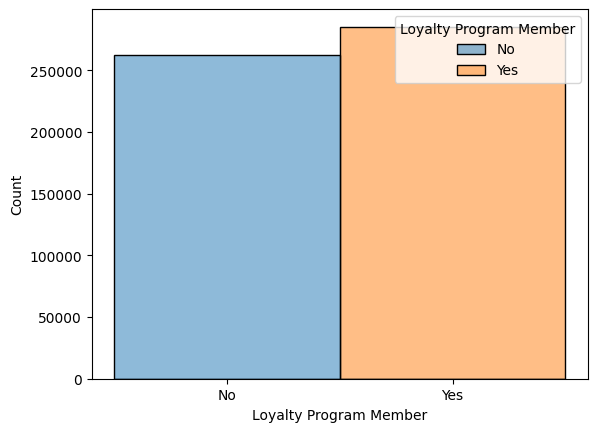

In [83]:
sns.histplot(df, x='Loyalty Program Member', hue='Loyalty Program Member');

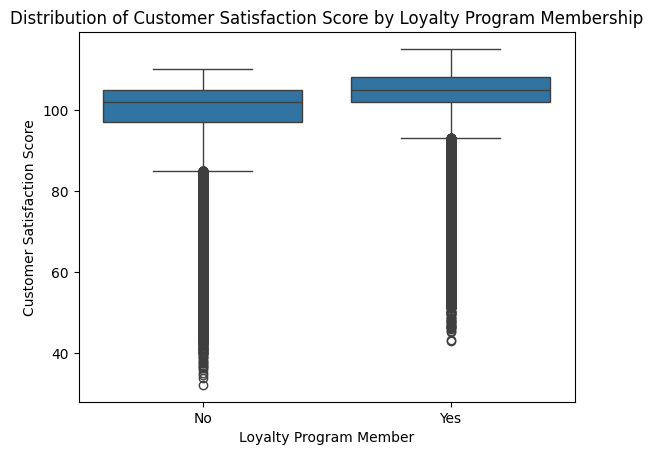

In [84]:
# Crear el diagrama de caja
sns.boxplot(x='Loyalty Program Member', y='Customer Satisfaction Score', data=df)

# Añadir etiquetas y título
plt.xlabel('Loyalty Program Member')
plt.ylabel('Customer Satisfaction Score')
plt.title('Distribution of Customer Satisfaction Score by Loyalty Program Membership')

# Mostrar el diagrama
plt.show()

In [85]:
print(df['Loyalty Program Member'].nunique())
print('-'*100)
print(df['Loyalty Program Member'].unique())
print('-'*100)
print(df['Loyalty Program Member'].value_counts(normalize=False))

2
----------------------------------------------------------------------------------------------------
['No' 'Yes']
----------------------------------------------------------------------------------------------------
Loyalty Program Member
Yes    285381
No     262187
Name: count, dtype: int64


In [86]:
df.groupby('Loyalty Program Member')['Customer Satisfaction Score'].mean().sort_values()

Loyalty Program Member
No      99.495726
Yes    103.648591
Name: Customer Satisfaction Score, dtype: float64

In [87]:
df['Loyalty Program Member'] = df['Loyalty Program Member'].map({'No': 0,
                                                                 'Yes': 4})

Columna Month

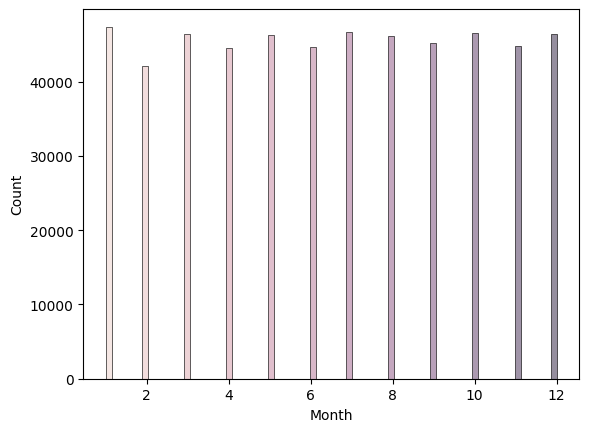

In [88]:
sns.histplot(df, x='Month', hue='Month', legend=False);

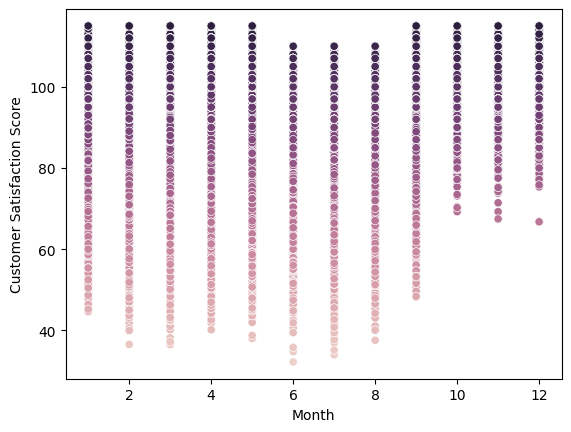

In [89]:
sns.scatterplot(df, x='Month', y='Customer Satisfaction Score', hue='Customer Satisfaction Score', legend=False);

In [90]:
print(df['Month'].nunique())
print('-'*100)
print(df['Month'].unique())
print('-'*100)
print(df['Month'].value_counts(normalize=False))

12
----------------------------------------------------------------------------------------------------
[ 9  3  5  4  6 11 10 12  8  7  1  2]
----------------------------------------------------------------------------------------------------
Month
1     47424
7     46661
10    46552
3     46509
12    46507
5     46342
8     46114
9     45203
11    44852
6     44629
4     44580
2     42195
Name: count, dtype: int64


In [91]:
df.groupby('Month')['Customer Satisfaction Score'].mean().sort_values()

Month
6      97.509648
7      98.108505
8      98.748483
2     100.048068
3     100.641811
4     101.280499
5     101.831287
1     103.360684
9     104.428816
12    104.578053
10    104.584858
11    104.601597
Name: Customer Satisfaction Score, dtype: float64

In [92]:
df['Month'] = df['Month'].map({6: 0,
                               7: 1,
                               8: 1,
                               2: 3,
                               3: 3,
                               4: 4,
                               5: 4,
                               1: 6,
                               9: 7,
                               12: 7,
                               10: 7,
                               11: 7})

Correlación

In [93]:
df.columns

Index(['Age', 'Gender', 'Occupation', 'Travel Class', 'Destination',
       'Star System', 'Distance to Destination (Light-Years)',
       'Duration of Stay (Earth Days)', 'Number of Companions',
       'Purpose of Travel', 'Transportation Type', 'Price (Galactic Credits)',
       'Booking Date', 'Departure Date', 'Special Requests',
       'Loyalty Program Member', 'Month', 'Customer Satisfaction Score',
       'Tiempo Espera'],
      dtype='object')

In [96]:
df = df[['Age', 'Gender', 'Occupation', 'Travel Class', 'Destination',
       'Star System', 'Distance to Destination (Light-Years)',
       'Duration of Stay (Earth Days)', 'Number of Companions',
       'Purpose of Travel', 'Transportation Type', 'Price (Galactic Credits)',
       'Booking Date', 'Departure Date', 'Special Requests',
       'Loyalty Program Member', 'Month', 
       'Tiempo Espera', 'Customer Satisfaction Score']]

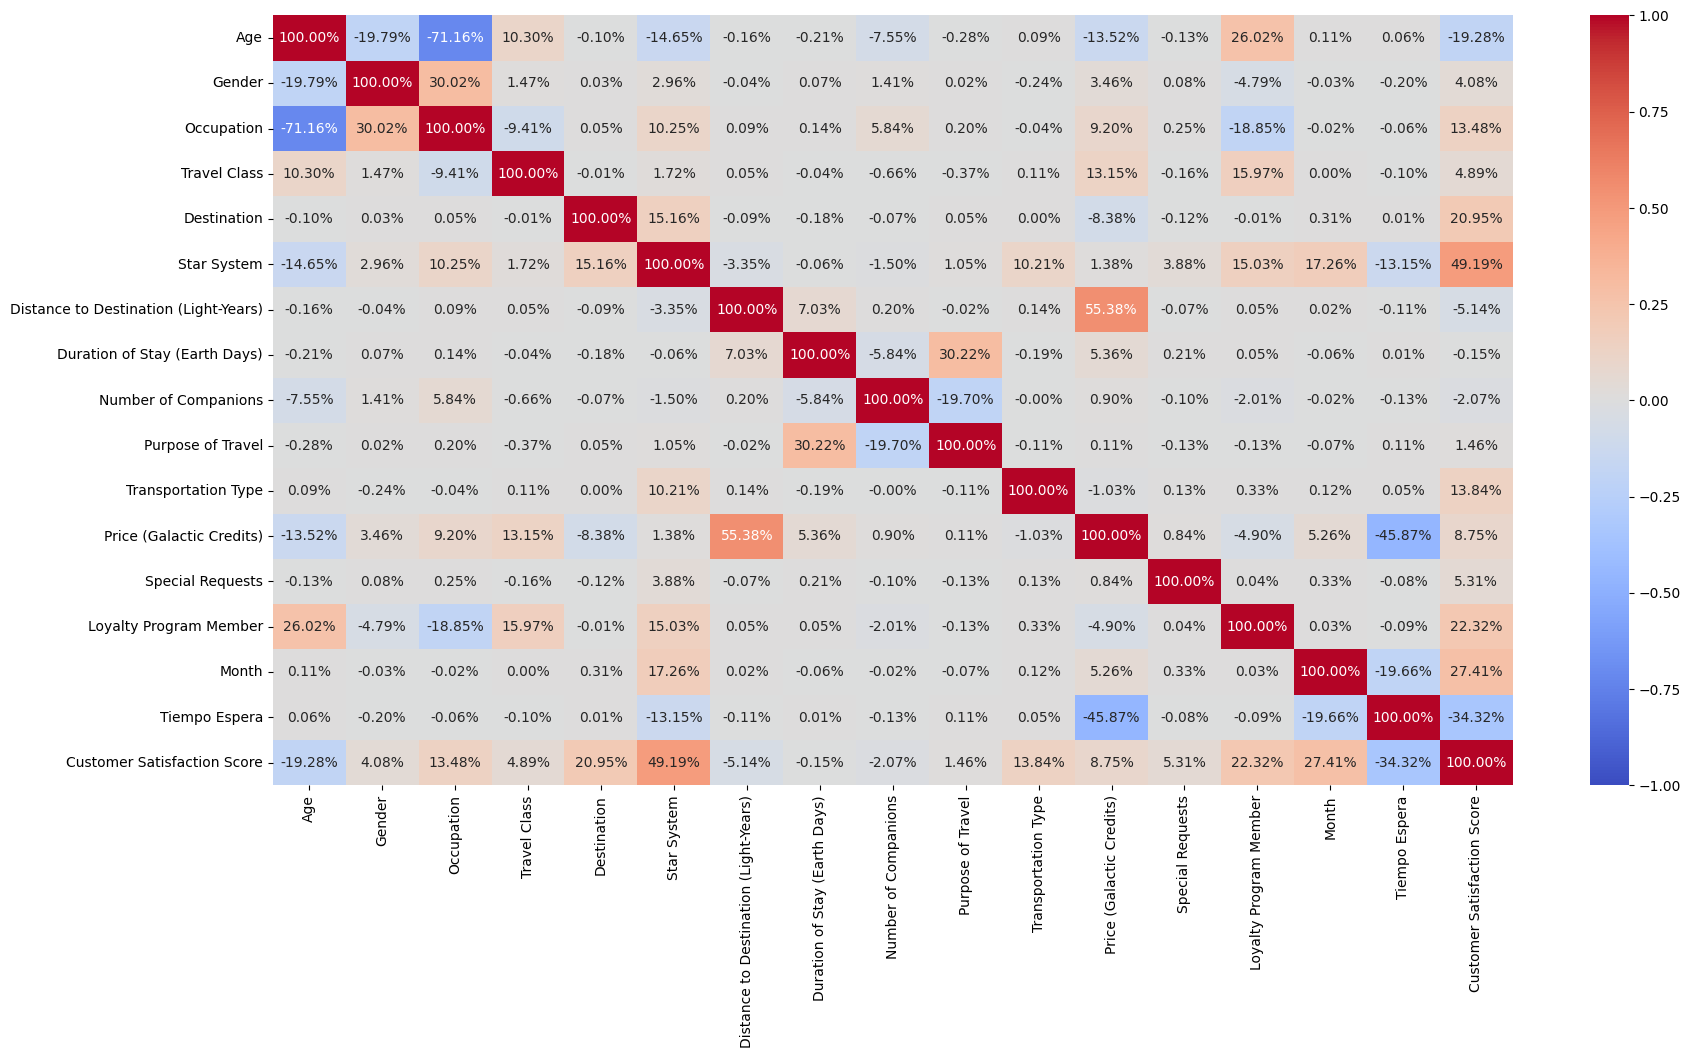

In [107]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(numeric_only=True), vmin=-1, vmax=1, annot=True, cmap='coolwarm', fmt='.2%');

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 547568 entries, 0 to 547567
Data columns (total 19 columns):
 #   Column                                 Non-Null Count   Dtype         
---  ------                                 --------------   -----         
 0   Age                                    547568 non-null  int64         
 1   Gender                                 547568 non-null  int64         
 2   Occupation                             547568 non-null  int64         
 3   Travel Class                           547568 non-null  int64         
 4   Destination                            547568 non-null  int64         
 5   Star System                            547568 non-null  int64         
 6   Distance to Destination (Light-Years)  547568 non-null  float64       
 7   Duration of Stay (Earth Days)          547568 non-null  float64       
 8   Number of Companions                   547568 non-null  int64         
 9   Purpose of Travel                      547568 no